In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# 데이터 불러오기
respec = pd.read_csv('/content/gdrive/MyDrive/BigContest_data/respec.csv')
respec

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage
0,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,3,2022.0,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0
1,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,5,2021.0,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0
2,1237618,717213,1.0,2022-06-07 03:26:54,530.0,51000000.0,3,2017.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,0.0,0.0,30.0
3,647624,796103,1.0,2022-06-07 23:07:42,520.0,61000000.0,3,2019.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,7.0,96000000.0,40.0
4,223654,325066,0.0,2022-06-07 16:39:55,570.0,26000000.0,3,2020.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,5.0,58000000.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394126,1864587,489900,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,2021.0,기타,기타가족소유,5000000.0,BUSINESS,0.0,0.0,0.0,0.0,20.0
1394127,1327066,151422,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,2017.0,기타,자가,50000000.0,LIVING,1.0,1.0,1.0,31000000.0,60.0
1394128,1319606,173524,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,2009.0,정규직,자가,100000000.0,SWITCHLOAN,1.0,1.0,8.0,200000000.0,40.0
1394129,1482466,766546,1.0,2022-03-22 22:12:35,640.0,50000000.0,3,2017.0,정규직,자가,10000000.0,SWITCHLOAN,0.0,1.0,10.0,117000000.0,40.0


In [4]:
respec.isnull().sum()

application_id                              0
user_id                                     0
gender                                      0
insert_time                                 0
credit_score                           105112
yearly_income                               0
income_type                                 0
company_enter_month                         0
employment_type                             0
houseown_type                               0
desired_amount                              0
purpose                                     0
personal_rehabilitation_yn                  0
personal_rehabilitation_complete_yn         0
existing_loan_cnt                           0
existing_loan_amt                           0
reage                                       0
dtype: int64

단위변환 (ex 하루 24시간을 12시간으로 변환)

표현형식 변환 (ex 날짜로 요일 변환, 남/여 데이터를 0/1 이진 변수로 변환)

요약 통계량 변환 (ex 고객별 누적 방문 횟수 집계)

정보 추출 (ex 주민등록번호에서 나이와 성별 추출)

변수 결합 (ex 매출액과 방문횟수 데이터로 평균 매출액 추출)

조건문 이용 (ex 기준값을 정하고 조건문을 통해 평균에 따라 TRUE, FALSE를 구분한 파생변수 생성)
[출처] [빅데이터 탐색] 파생변수 / 변수 변환 / 불균형 데이터 처리|작성자 연

# 파생변수 1
* 근속연수
* company_enter_month 를 company_work_year 로 바꿈
* insert time의 연도 기준

In [5]:
respec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394131 entries, 0 to 1394130
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394131 non-null  int64  
 1   user_id                              1394131 non-null  int64  
 2   gender                               1394131 non-null  float64
 3   insert_time                          1394131 non-null  object 
 4   credit_score                         1289019 non-null  float64
 5   yearly_income                        1394131 non-null  float64
 6   income_type                          1394131 non-null  int64  
 7   company_enter_month                  1394131 non-null  float64
 8   employment_type                      1394131 non-null  object 
 9   houseown_type                        1394131 non-null  object 
 10  desired_amount                       1394131 non-null  float64
 11

In [6]:
respec['company_work_year'] = 2023 - respec['company_enter_month']
respec

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,company_work_year
0,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,3,2022.0,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0,1.0
1,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,5,2021.0,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0,2.0
2,1237618,717213,1.0,2022-06-07 03:26:54,530.0,51000000.0,3,2017.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,0.0,0.0,30.0,6.0
3,647624,796103,1.0,2022-06-07 23:07:42,520.0,61000000.0,3,2019.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,7.0,96000000.0,40.0,4.0
4,223654,325066,0.0,2022-06-07 16:39:55,570.0,26000000.0,3,2020.0,정규직,전월세,5000000.0,LIVING,0.0,0.0,5.0,58000000.0,30.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394126,1864587,489900,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,2021.0,기타,기타가족소유,5000000.0,BUSINESS,0.0,0.0,0.0,0.0,20.0,2.0
1394127,1327066,151422,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,2017.0,기타,자가,50000000.0,LIVING,1.0,1.0,1.0,31000000.0,60.0,6.0
1394128,1319606,173524,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,2009.0,정규직,자가,100000000.0,SWITCHLOAN,1.0,1.0,8.0,200000000.0,40.0,14.0
1394129,1482466,766546,1.0,2022-03-22 22:12:35,640.0,50000000.0,3,2017.0,정규직,자가,10000000.0,SWITCHLOAN,0.0,1.0,10.0,117000000.0,40.0,6.0


In [7]:
respec = respec.drop(['company_enter_month'], axis = 1)

# 파생변수 2
* existing_loan_amt / existing_loan_cnt	 = 과거 대출 1회 당 평균 금액

In [8]:
a = respec[respec['existing_loan_cnt'] == 0]
a

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,company_work_year
2,1237618,717213,1.0,2022-06-07 03:26:54,530.0,51000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,0.0,0.0,30.0,6.0
7,847896,382180,0.0,2022-06-07 16:50:02,550.0,30000000.0,3,계약직,기타가족소유,20000000.0,LIVING,0.0,0.0,0.0,0.0,30.0,1.0
12,1943244,147191,1.0,2022-06-07 10:52:03,650.0,40000000.0,1,정규직,기타가족소유,20000000.0,LIVING,0.0,2.0,0.0,0.0,20.0,2.0
15,424012,407760,1.0,2022-06-07 21:29:37,NaN,45000000.0,3,정규직,전월세,18000000.0,SWITCHLOAN,0.0,0.0,0.0,0.0,30.0,7.0
19,1355252,180240,0.0,2022-04-20 15:21:40,930.0,31000000.0,3,정규직,전월세,50000000.0,BUYHOUSE,0.0,2.0,0.0,0.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394099,1107103,162983,1.0,2022-03-22 12:14:17,750.0,55000000.0,3,정규직,전월세,50000000.0,LIVING,1.0,1.0,0.0,0.0,40.0,9.0
1394118,943512,183117,0.0,2022-03-22 16:22:21,710.0,24000000.0,3,정규직,전월세,25000000.0,HOUSEDEPOSIT,0.0,1.0,0.0,0.0,20.0,1.0
1394119,1663661,183117,0.0,2022-03-22 17:37:49,710.0,30000000.0,4,기타,전월세,25000000.0,ETC,1.0,1.0,0.0,0.0,20.0,2.0
1394126,1864587,489900,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,기타,기타가족소유,5000000.0,BUSINESS,0.0,0.0,0.0,0.0,20.0,2.0


In [9]:
b = respec[respec['existing_loan_cnt'] != 0]
b

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,company_work_year
0,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,3,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0,1.0
1,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,5,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0,2.0
3,647624,796103,1.0,2022-06-07 23:07:42,520.0,61000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,7.0,96000000.0,40.0,4.0
4,223654,325066,0.0,2022-06-07 16:39:55,570.0,26000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,5.0,58000000.0,30.0,3.0
5,93276,56363,0.0,2022-06-07 14:16:08,550.0,32000000.0,3,정규직,전월세,100000000.0,LIVING,0.0,0.0,1.0,17000000.0,20.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394124,256365,762698,1.0,2022-03-22 14:42:04,640.0,12000000.0,3,일용직,전월세,5000000.0,SWITCHLOAN,1.0,1.0,6.0,76000000.0,20.0,2.0
1394125,316356,53701,1.0,2022-03-22 10:01:38,730.0,60000000.0,1,정규직,전월세,15000000.0,BUSINESS,0.0,1.0,1.0,31000000.0,20.0,2.0
1394127,1327066,151422,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,기타,자가,50000000.0,LIVING,1.0,1.0,1.0,31000000.0,60.0,6.0
1394128,1319606,173524,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,정규직,자가,100000000.0,SWITCHLOAN,1.0,1.0,8.0,200000000.0,40.0,14.0


In [10]:
respec['existing_loan_avg'] = b['existing_loan_amt'] / b['existing_loan_cnt']
respec

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,company_work_year,existing_loan_avg
0,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,3,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0,1.0,3.800000e+06
1,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,5,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0,2.0,2.300000e+06
2,1237618,717213,1.0,2022-06-07 03:26:54,530.0,51000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,0.0,0.0,30.0,6.0,NaN
3,647624,796103,1.0,2022-06-07 23:07:42,520.0,61000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,7.0,96000000.0,40.0,4.0,1.371429e+07
4,223654,325066,0.0,2022-06-07 16:39:55,570.0,26000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,5.0,58000000.0,30.0,3.0,1.160000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394126,1864587,489900,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,기타,기타가족소유,5000000.0,BUSINESS,0.0,0.0,0.0,0.0,20.0,2.0,NaN
1394127,1327066,151422,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,기타,자가,50000000.0,LIVING,1.0,1.0,1.0,31000000.0,60.0,6.0,3.100000e+07
1394128,1319606,173524,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,정규직,자가,100000000.0,SWITCHLOAN,1.0,1.0,8.0,200000000.0,40.0,14.0,2.500000e+07
1394129,1482466,766546,1.0,2022-03-22 22:12:35,640.0,50000000.0,3,정규직,자가,10000000.0,SWITCHLOAN,0.0,1.0,10.0,117000000.0,40.0,6.0,1.170000e+07


In [11]:
respec['existing_loan_avg'] = respec['existing_loan_avg'].fillna(0)
respec

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,company_work_year,existing_loan_avg
0,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,3,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0,1.0,3.800000e+06
1,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,5,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0,2.0,2.300000e+06
2,1237618,717213,1.0,2022-06-07 03:26:54,530.0,51000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,0.0,0.0,30.0,6.0,0.000000e+00
3,647624,796103,1.0,2022-06-07 23:07:42,520.0,61000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,7.0,96000000.0,40.0,4.0,1.371429e+07
4,223654,325066,0.0,2022-06-07 16:39:55,570.0,26000000.0,3,정규직,전월세,5000000.0,LIVING,0.0,0.0,5.0,58000000.0,30.0,3.0,1.160000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394126,1864587,489900,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,기타,기타가족소유,5000000.0,BUSINESS,0.0,0.0,0.0,0.0,20.0,2.0,0.000000e+00
1394127,1327066,151422,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,기타,자가,50000000.0,LIVING,1.0,1.0,1.0,31000000.0,60.0,6.0,3.100000e+07
1394128,1319606,173524,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,정규직,자가,100000000.0,SWITCHLOAN,1.0,1.0,8.0,200000000.0,40.0,14.0,2.500000e+07
1394129,1482466,766546,1.0,2022-03-22 22:12:35,640.0,50000000.0,3,정규직,자가,10000000.0,SWITCHLOAN,0.0,1.0,10.0,117000000.0,40.0,6.0,1.170000e+07


# 파생변수 3
* loanapply_inset_time 을 요일로 바꾸기 (엑셀로 함)

1: 일, 2: 월, 3: 화, 4: 수, 5: 목, 6: 금, 7: 토

In [12]:
loan_result_new = pd.read_csv('/content/gdrive/MyDrive/BigContest_data/loan_result_new.csv')
loan_result_new

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,week_day,is_applied
0,1748340,2022.6.7,7,191,42000000.0,13.6,3,NaN
1,1748340,2022.6.7,25,169,24000000.0,17.9,3,NaN
2,1748340,2022.6.7,2,7,24000000.0,18.5,3,NaN
3,1748340,2022.6.7,4,268,29000000.0,10.8,3,NaN
4,1748340,2022.6.7,11,118,5000000.0,16.4,3,NaN
...,...,...,...,...,...,...,...,...
1048570,1398164,2022.6.22,23,108,23000000.0,13.7,4,NaN
1048571,1398164,2022.6.22,1,61,4000000.0,13.9,4,NaN
1048572,1398164,2022.6.22,7,220,7000000.0,12.4,4,NaN
1048573,1398164,2022.6.22,62,200,25000000.0,11.8,4,NaN


In [13]:
loan_result_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   application_id         1048575 non-null  int64  
 1   loanapply_insert_time  1048575 non-null  object 
 2   bank_id                1048575 non-null  int64  
 3   product_id             1048575 non-null  int64  
 4   loan_limit             1048172 non-null  float64
 5   loan_rate              1048172 non-null  float64
 6   week_day               1048575 non-null  int64  
 7   is_applied             704880 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 64.0+ MB


In [14]:
loan_result_new['week_day'].unique()

array([3, 2, 1, 4, 7, 6, 5])

In [15]:
applied = loan_result_new[(loan_result_new['is_applied'] == 1)]

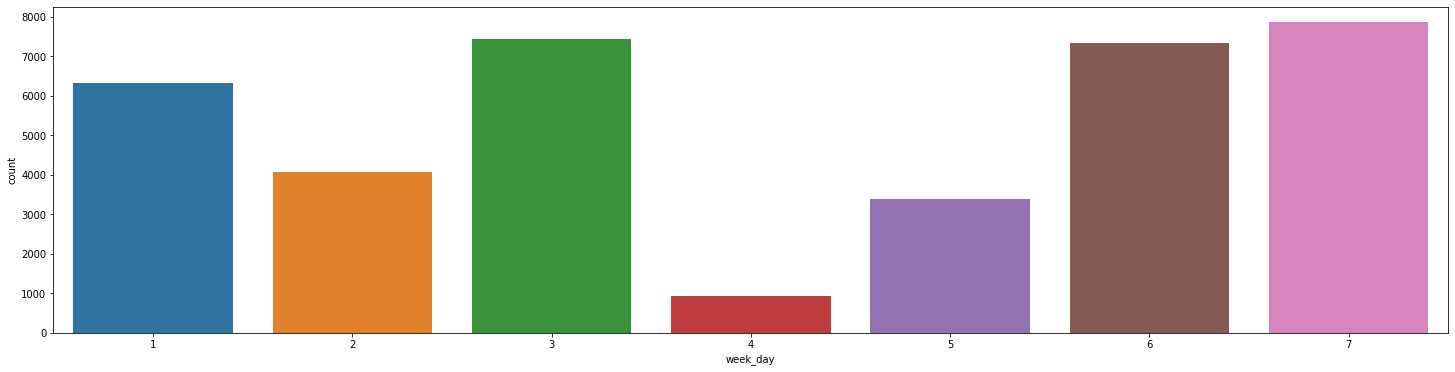

In [16]:
plt.figure(figsize = (25,6))
sns.countplot(data = applied, x = 'week_day')